<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/SDS/SDS_Assignment_AlternativesPandas_File2_Koalas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1> COMPARISON BETWEEN PANDAS AND KOALAS LIBRARY ON NYX YELLOW TAXI DATASET<h1>**


---



**Group Members:**

<table width = 700>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>ONG HAN WAH</th>
    <th>A20EC0129</th>
  </tr>
  <tr>
    <th>GOO YE JUI</th>
    <th>A20EC0191</th>
  </tr>
    <tr>
    <th>MAIZATUL AFRINA SAFIAH BINTI SAIFUL AZWAN</th>
    <th>A20EC0204</th>
  </tr>
    
</table> 

#### Install Libraries



In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=19f1308b5f05a138e5ee272a27b597fc8a691cb5d99751ab011d4cc3541b949c
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import time
import databricks.koalas as ks
from pyspark.sql import SparkSession

#### Read Dataset

In [ ]:
# Read dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1d5jg1ER12xiMys6-bOPfCYR1DAp0nnNY/view'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('yellow_tripdata_2015-01.csv') 

###COMPARISON BETWEEN KOALAS AND PANDAS

Pandas package is used to manipulate data sets. It offers tools for data exploration, cleaning, analysis, and manipulation. With the aid of Pandas, we can examine large data sets and draw conclusions based on statistical principles. Pandas also can organise disorganised data sets, making them readable and useful.


Koalas is an open-source Python package that implements the pandas API on top of Apache Spark. Data scientists don't have to learn a new framework in order to move from a single computer to a distributed environment using Koalas.

In [ ]:
result = {}
func_list = ['read_csv', 'head', 'tail', 'describe', 'sum', 'agg', 'groupby', 'isnull', 'fillna', 'dropna']
for a in func_list:
  result[a] = {}


#### Read Dataset Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf = ks.read_csv('/content/yellow_tripdata_2015-01.csv')
e = time.time()
result['read_csv']['koalas'] = e-s

CPU times: user 678 ms, sys: 88.1 ms, total: 766 ms
Wall time: 1min 40s


In [ ]:
s = time.time()
%time df = pd.read_csv('/content/yellow_tripdata_2015-01.csv')
e = time.time()
result['read_csv']['pandas'] = e-s

CPU times: user 40.9 s, sys: 7.48 s, total: 48.4 s
Wall time: 49.1 s


#### Display Top 5 Records Koalas VS Pandas




In [ ]:
s = time.time()
%time kdf.head()
e = time.time()
result['head']['koalas'] = e-s

CPU times: user 36.5 ms, sys: 5.91 ms, total: 42.4 ms
Wall time: 263 ms


In [ ]:
s = time.time()
%time df.head()
e = time.time()
result['head']['pandas'] = e-s

CPU times: user 327 µs, sys: 61 µs, total: 388 µs
Wall time: 395 µs


#### Display Bottom 5 Records Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf.tail()
e = time.time()
result['tail']['koalas'] = e-s

CPU times: user 877 ms, sys: 108 ms, total: 985 ms
Wall time: 2min 7s


In [ ]:
s = time.time()
%time df.tail()
e = time.time()
result['tail']['pandas'] = e-s

CPU times: user 197 µs, sys: 28 µs, total: 225 µs
Wall time: 231 µs


#### Describe Dataset Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf.describe()
e = time.time()
result['describe']['koalas'] = e-s

CPU times: user 2.15 s, sys: 283 ms, total: 2.44 s
Wall time: 5min 10s


In [ ]:
s = time.time()
%time df.describe()
e = time.time()
result['describe']['pandas'] = e-s

CPU times: user 11.2 s, sys: 4.51 s, total: 15.7 s
Wall time: 21.2 s


#### Sum Operation Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf['trip_distance'].sum()
e = time.time()
result['sum']['koalas'] = e-s

CPU times: user 161 ms, sys: 25.1 ms, total: 186 ms
Wall time: 24.3 s


In [ ]:
s = time.time()
%time df['trip_distance'].sum()
e = time.time()
result['sum']['pandas'] = e-s

CPU times: user 28.8 ms, sys: 5.63 ms, total: 34.4 ms
Wall time: 36.3 ms


#### Aggregate Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf.agg(['min'])[['trip_distance']]
e = time.time()
result['agg']['koalas'] = e-s

CPU times: user 191 ms, sys: 17 ms, total: 208 ms
Wall time: 1.73 s


In [ ]:
s = time.time()
%time df.agg(['min'])[['trip_distance']]
e = time.time()
result['agg']['pandas'] = e-s

CPU times: user 3.89 s, sys: 37.1 ms, total: 3.93 s
Wall time: 3.95 s


#### Grouping Koalas VS Pandas

In [ ]:
s = time.time()
%time temp = kdf.groupby(['passenger_count']).count()
e = time.time()
result['groupby']['koalas'] = e-s

CPU times: user 149 ms, sys: 19.8 ms, total: 169 ms
Wall time: 955 ms


In [ ]:
s = time.time()
%time temp = df.groupby(['passenger_count']).count()
e = time.time()
result['groupby']['pandas'] = e-s

CPU times: user 3.75 s, sys: 93.5 ms, total: 3.84 s
Wall time: 3.85 s


#### isnull KoalasVS Pandas

In [ ]:
s = time.time()
%time kdf.isnull().sum()
e = time.time()
result['isnull']['koalas'] = e-s

CPU times: user 777 ms, sys: 115 ms, total: 892 ms
Wall time: 1min 7s


In [ ]:
s = time.time()
%time df.isnull().sum()
e = time.time()
result['isnull']['pandas'] = e-s

CPU times: user 2.43 s, sys: 26.7 ms, total: 2.46 s
Wall time: 2.46 s


#### fillna Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf.fillna('0.3')
e = time.time()
result['fillna']['koalas'] = e-s

CPU times: user 248 ms, sys: 34.2 ms, total: 282 ms
Wall time: 1.48 s


In [ ]:
s = time.time()
%time df.fillna('0.3')
e = time.time()
result['fillna']['pandas'] = e-s

CPU times: user 4.3 s, sys: 355 ms, total: 4.65 s
Wall time: 4.64 s


#### dropna Koalas VS Pandas

In [ ]:
s = time.time()
%time kdf.dropna()
e = time.time()
result['dropna']['koalas'] = e-s

CPU times: user 219 ms, sys: 28.9 ms, total: 248 ms
Wall time: 885 ms


In [ ]:
s = time.time()
%time df.dropna()
e = time.time()
result['dropna']['pandas'] = e-s

CPU times: user 3.69 s, sys: 59.3 ms, total: 3.75 s
Wall time: 3.76 s


#### Comparison Bar Chart

In [ ]:
result_df = pd.DataFrame.from_dict(result,orient='index')
result_df

,koalas,pandas
read_csv,100.516324,49.069192
head,0.266857,0.003376
tail,127.258166,0.000978
describe,310.018327,21.222414
sum,24.329168,0.037966
agg,1.727700,3.954798
groupby,0.955671,3.855587
isnull,67.897667,2.464641
fillna,1.487299,5.027673
dropna,0.885875,3.967247


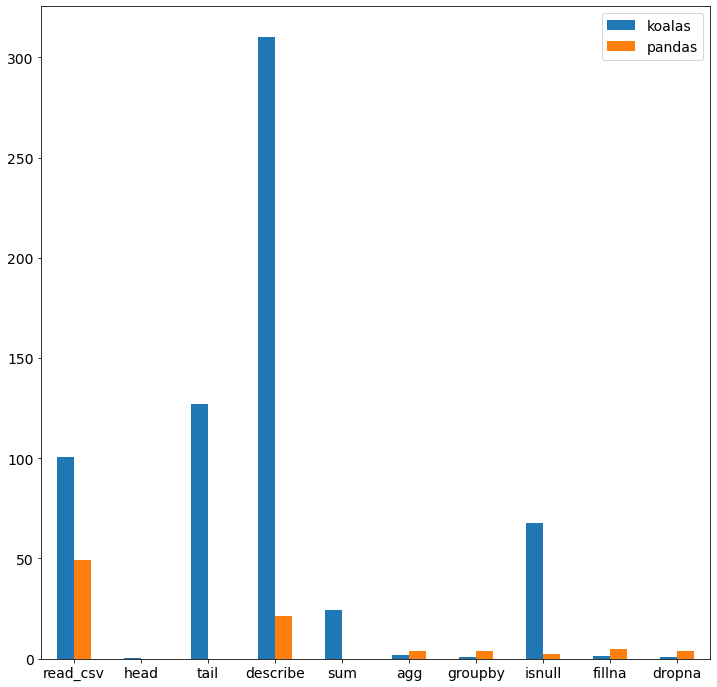

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 12)

ax = result_df.plot.bar(rot=0)

Koalas is faster than pandas in terms of `aggregate`, `groupby`, `fillna` and `dropna`.